In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
def display(y_test,y_pred):
    plt.figure(figsize=(10,8))
    plt.title('PREDICTION VS ACTUAL ', fontsize=24 , fontstyle='italic')
    plt.plot(range(len(y_test)), np.sort(y_test), '.')
    plt.plot(range(len(y_test)),np.sort(y_pred),c='r')
    plt.show()

In [35]:
def score(y_pred,y_test):
    from sklearn.metrics import mean_squared_error , r2_score
    print('Mean Squared Error : ', mean_squared_error(y_pred,y_test))
    print('R______Score Error : ', r2_score(y_pred,y_test))

In [36]:
def hypothesis(model):
    try:
        print(type(model).__name__,' Model coefficient ',model.coef_)
        print(type(model).__name__,' Model collinearity ',model.intercept_)
    except:
        print(type(model).__name__,' Has no coefficient and collinearity')

In [37]:
dataSet = pd.read_excel('Concrete_Data.xls')
dataSet.columns = ['Cement','Slag','Ash','Water','Superplasticizer','Coarse','Fine','Age','strength']

In [38]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
Slag                1030 non-null float64
Ash                 1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
Coarse              1030 non-null float64
Fine                1030 non-null float64
Age                 1030 non-null int64
strength            1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [39]:
dataSet.isnull().sum()

Cement              0
Slag                0
Ash                 0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age                 0
strength            0
dtype: int64

In [40]:
dataSet.describe()

,Cement,Slag,Ash,Water,Superplasticizer,Coarse,Fine,Age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [41]:
dataSet.corr()

,Cement,Slag,Ash,Water,Superplasticizer,Coarse,Fine,Age,strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


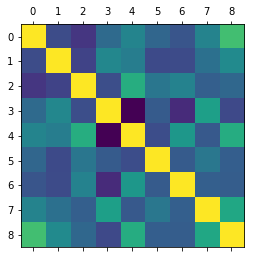

In [42]:
plt.matshow(dataSet.corr())
plt.show()

C:\Users\Geek\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024CDC6C4C88>,
      dtype=object)

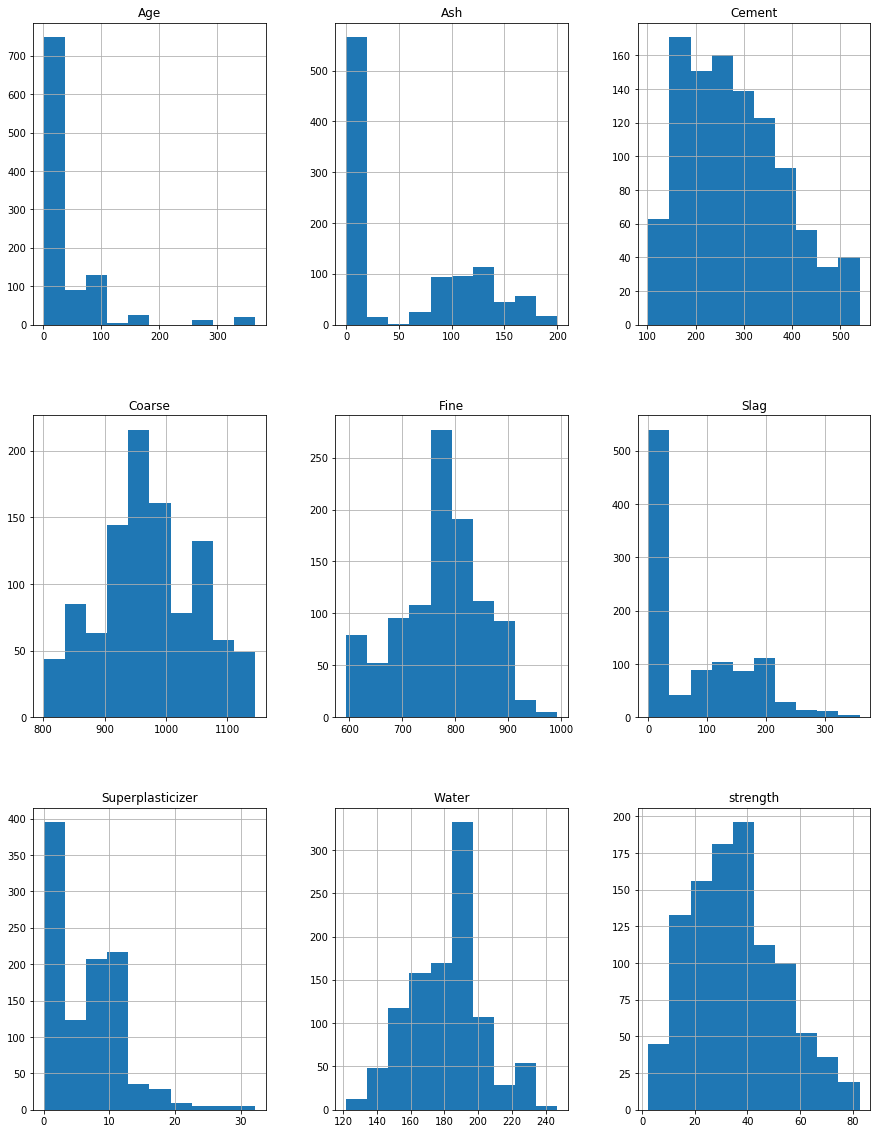

In [43]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataSet.hist(ax = ax)

In [44]:
# we found outliers in Age columns 
# so we will delete it by IQR technique
def outliers_with_IQR(data,key,kernal=1.5):
    import statistics
    med = int(len(data[key])/2)
    sorted_data = sorted(data[key])
    Q1 = statistics.median(sorted_data[:med])
    Q2 = statistics.median(sorted_data[med:])
    iqr = Q2 - Q1
    outliers_range_1 = Q1 - iqr*kernal
    outliers_range_2 = Q2 + iqr*kernal
    data = data[data[key]>outliers_range_1]
    data = data[data[key]<outliers_range_2]
    return data

In [45]:
dataSet.columns = ['Cement','Slag','Ash','Water','Superplasticizer','Coarse','Fine','Age','strength']
dataSet = outliers_with_IQR(dataSet,'Age')
dataSet = outliers_with_IQR(dataSet,'Cement')
dataSet = outliers_with_IQR(dataSet,'Slag')
dataSet = outliers_with_IQR(dataSet,'Ash')
dataSet = outliers_with_IQR(dataSet,'Water')
dataSet = outliers_with_IQR(dataSet,'Coarse')
dataSet = outliers_with_IQR(dataSet,'Fine')
dataSet = outliers_with_IQR(dataSet,'Water')

dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 1029
Data columns (total 9 columns):
Cement              971 non-null float64
Slag                971 non-null float64
Ash                 971 non-null float64
Water               971 non-null float64
Superplasticizer    971 non-null float64
Coarse              971 non-null float64
Fine                971 non-null float64
Age                 971 non-null int64
strength            971 non-null float64
dtypes: float64(8), int64(1)
memory usage: 75.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024CDC6C8E48>,
      dtype=object)

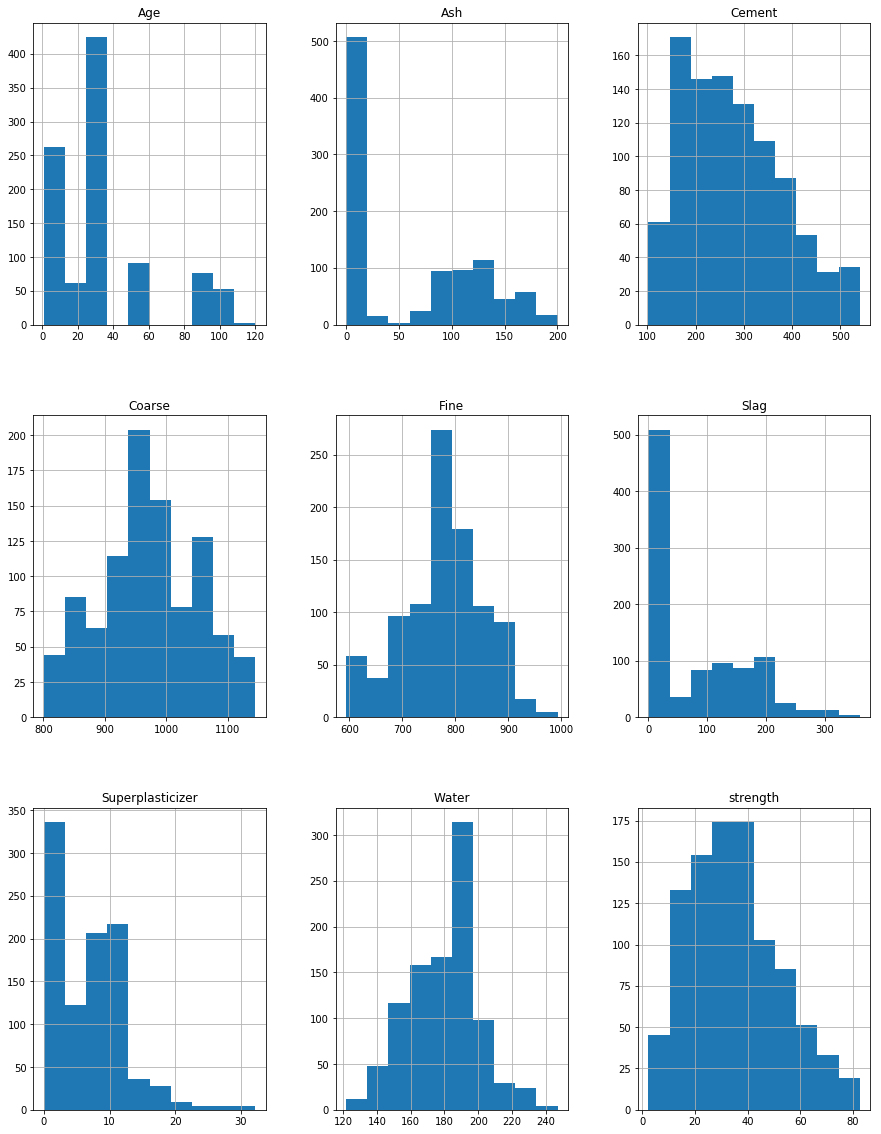

In [46]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataSet.hist(ax = ax)

X in  [0, 1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  70.64112680172472
R______Score Error :  0.6355716932759474
LinearRegression  Model coefficient  [ 1.12445792e-01  8.82641633e-02  6.35890905e-02 -1.58240400e-01
  2.25439001e-01  1.00827425e-02  8.96023530e-06  3.09337800e-01]
LinearRegression  Model collinearity  0.8935328639545759


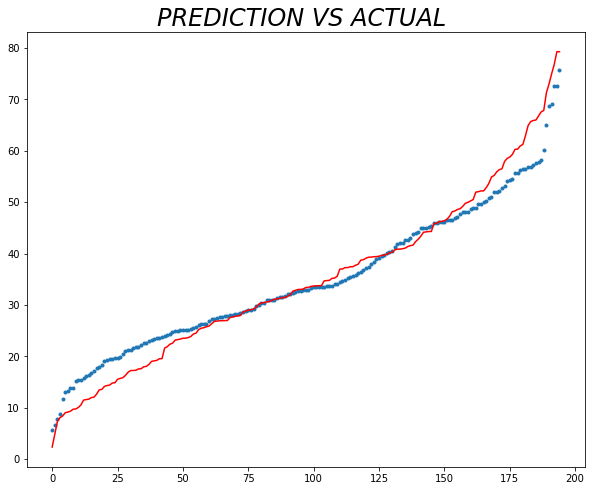

X in  [0, 1, 2, 3, 4, 5, 6]
Mean Squared Error :  156.16590294457058
R______Score Error :  -0.23396139430579344
LinearRegression  Model coefficient  [ 0.11934429  0.0982834   0.07990965 -0.11928336  0.33604038  0.02289535
  0.01439022]
LinearRegression  Model collinearity  -24.14569099467078


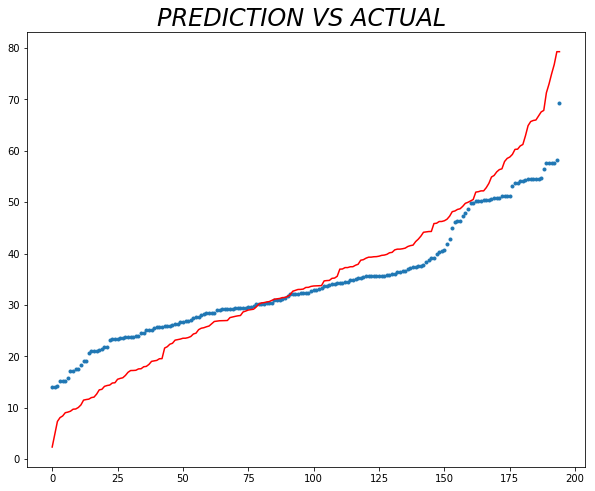

X in  [0, 1, 2, 3, 4, 5, 7]
Mean Squared Error :  70.64113540335796
R______Score Error :  0.6355724564818712
LinearRegression  Model coefficient  [ 0.1124398   0.08825689  0.06358074 -0.15826598  0.22542955  0.0100762
  0.30933828]
LinearRegression  Model collinearity  0.9141955102470831


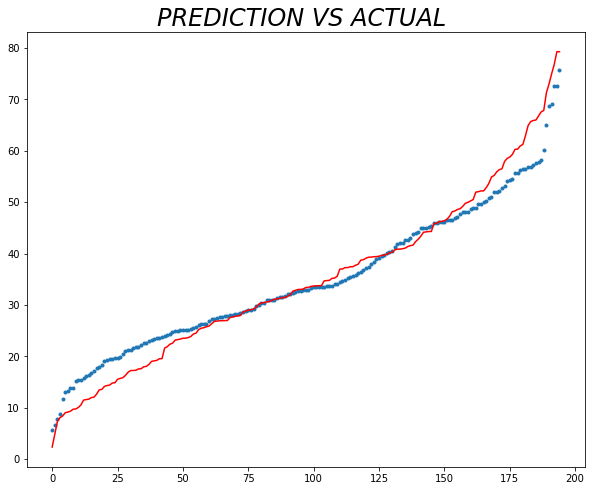

X in  [0, 1, 2, 3, 4, 6, 7]
Mean Squared Error :  69.80043184856419
R______Score Error :  0.6393858220664654
LinearRegression  Model coefficient  [ 0.10544351  0.07964733  0.05416767 -0.19196325  0.1921313  -0.0093637
  0.30995215]
LinearRegression  Model collinearity  27.384394389008772


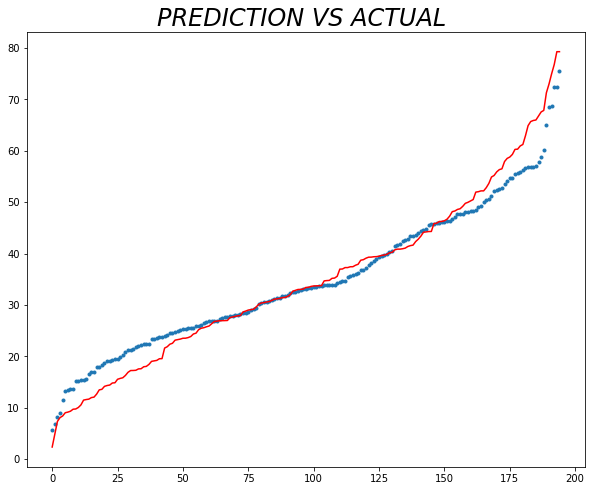

X in  [0, 1, 2, 3, 5, 6, 7]
Mean Squared Error :  69.50442150480181
R______Score Error :  0.6406945273813163
LinearRegression  Model coefficient  [ 0.112579    0.08813491  0.06711741 -0.20953566  0.00205121 -0.00325643
  0.31061657]
LinearRegression  Model collinearity  21.698174489426712


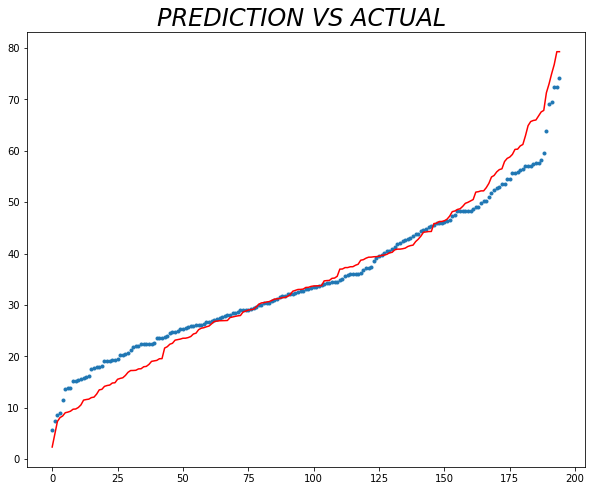

X in  [0, 1, 2, 4, 5, 6, 7]
Mean Squared Error :  74.99746144622195
R______Score Error :  0.6084010159074985
LinearRegression  Model coefficient  [0.13579798 0.11560818 0.09470943 0.42071188 0.0410386  0.03364517
 0.30762313]
LinearRegression  Model collinearity  -95.3700908572249


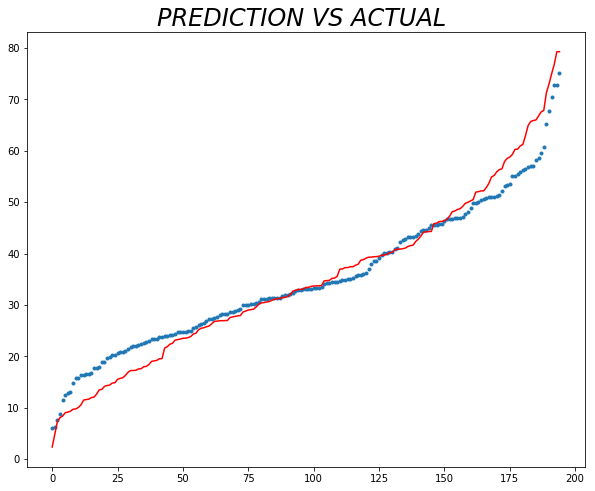

X in  [0, 1, 3, 4, 5, 6, 7]
Mean Squared Error :  74.38958493805052
R______Score Error :  0.6143630958840476
LinearRegression  Model coefficient  [ 0.07492305  0.04348176 -0.28012325  0.27804441 -0.02378867 -0.04297823
  0.31215119]
LinearRegression  Model collinearity  106.15703022073309


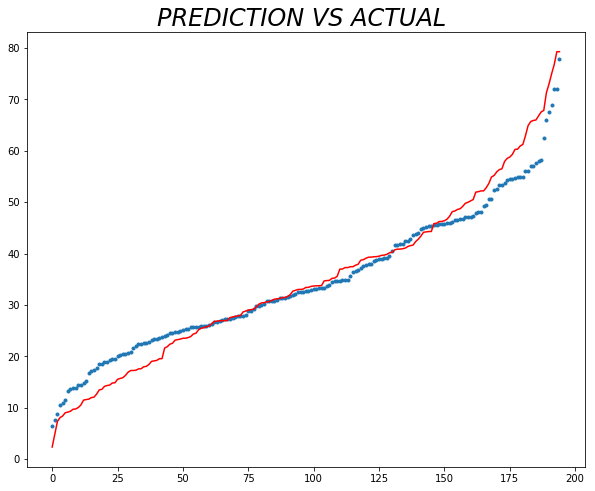

X in  [0, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  77.58725055859125
R______Score Error :  0.5941114769530229
LinearRegression  Model coefficient  [ 0.04724462 -0.03243722 -0.38787821  0.22130672 -0.05634464 -0.08035364
  0.31304129]
LinearRegression  Model collinearity  199.42319952799807


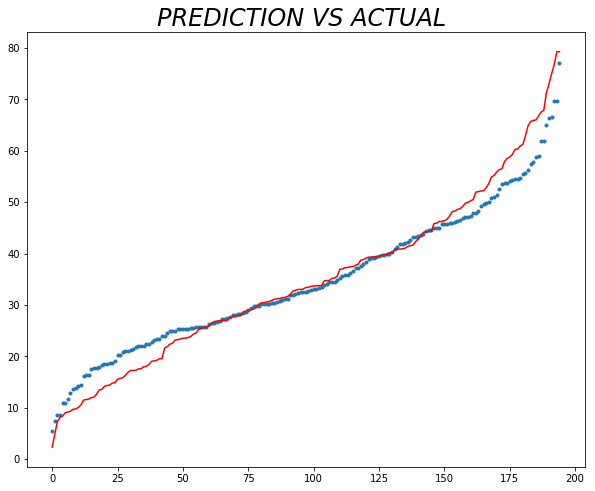

X in  [1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  85.52081162048884
R______Score Error :  0.5264733529113285
LinearRegression  Model coefficient  [-0.03216121 -0.08501818 -0.52045948  0.23330495 -0.08961876 -0.12213713
  0.31404751]
LinearRegression  Model collinearity  306.54059556542086


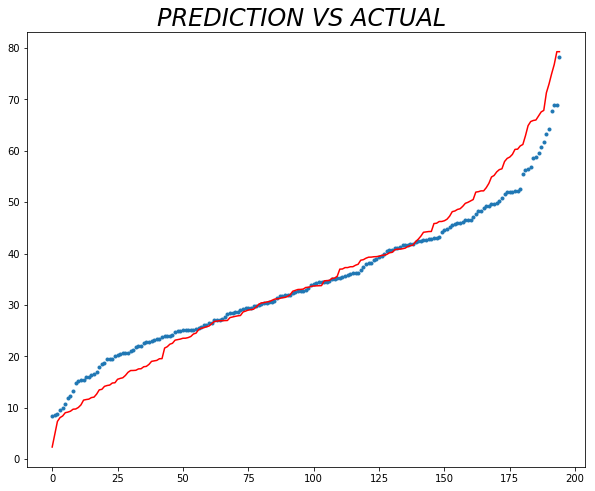

In [47]:
from sklearn.linear_model import LinearRegression

for i1 in range(dataSet.shape[1]-1,-1,-1):
    index = [i for i in range(dataSet.shape[1]-1) if i != i1 ]
    X = dataSet.iloc[:,index].values
    y = dataSet.iloc[:,-1].values
    print('X in ',index)

    from sklearn.model_selection import train_test_split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=0)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    score(y_pred,y_test)
    hypothesis(model)
    display(y_pred,y_test)

In [48]:
# Support Vector Machine 

X in  [0, 1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  70.84267643007732
R______Score Error :  0.6399237861819234
SVR  Model coefficient  [[ 0.11822459  0.08952595  0.06292278 -0.12349922  0.37570379  0.01217376
   0.00567938  0.29552385]]
SVR  Model collinearity  [-13.8359121]


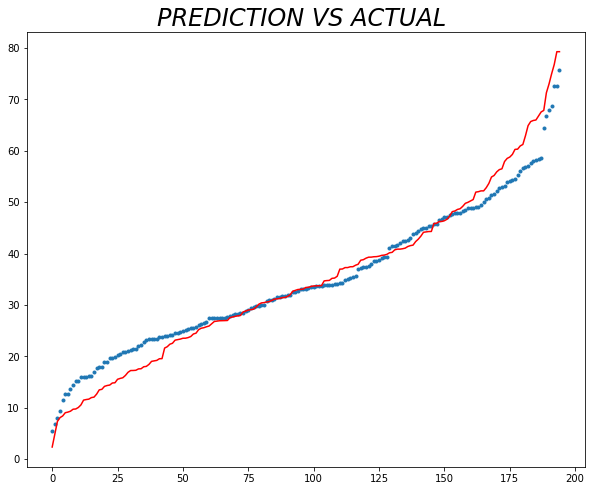

X in  [0, 1, 2, 3, 4, 5, 6]
Mean Squared Error :  158.5767521989463
R______Score Error :  -0.05908610675663706
SVR  Model coefficient  [[ 0.1503355   0.12877086  0.10570166 -0.07563538  0.18879263  0.03439379
   0.03865616]]
SVR  Model collinearity  [-73.0011488]


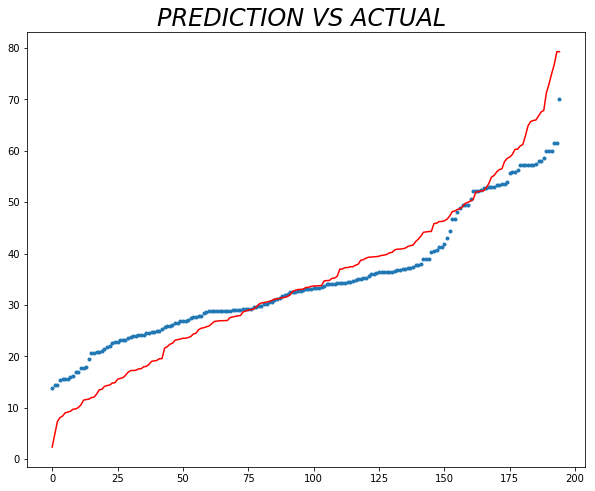

X in  [0, 1, 2, 3, 4, 5, 7]
Mean Squared Error :  70.78867059994717
R______Score Error :  0.6300455696640269
SVR  Model coefficient  [[ 0.11233016  0.08407464  0.05774968 -0.13158196  0.38166403  0.00731876
   0.29316291]]
SVR  Model collinearity  [-1.24002687]


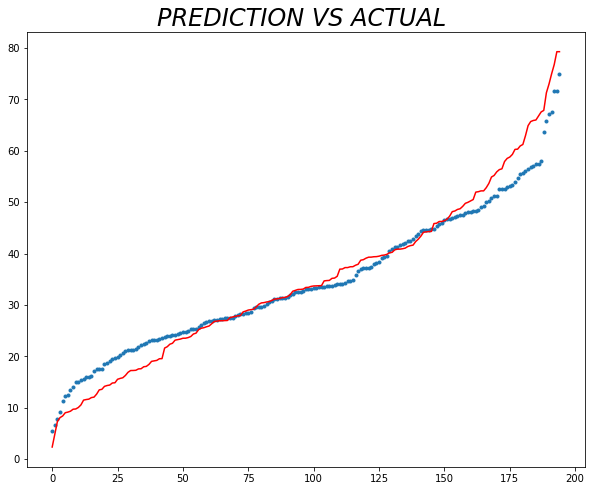

X in  [0, 1, 2, 3, 4, 6, 7]
Mean Squared Error :  70.33988940050538
R______Score Error :  0.6371969252420199
SVR  Model coefficient  [[ 0.10858487  0.07525678  0.05350592 -0.14817251  0.3465221  -0.00567759
   0.30255196]]
SVR  Model collinearity  [14.97446018]


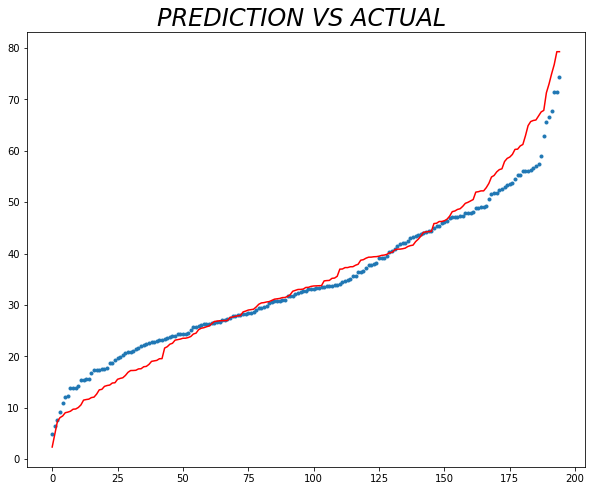

X in  [0, 1, 2, 3, 5, 6, 7]
Mean Squared Error :  69.038931994594
R______Score Error :  0.6585412023427206
SVR  Model coefficient  [[ 0.12057312  0.09303513  0.07177202 -0.19206311  0.0005593   0.00071828
   0.31200105]]
SVR  Model collinearity  [14.02773475]


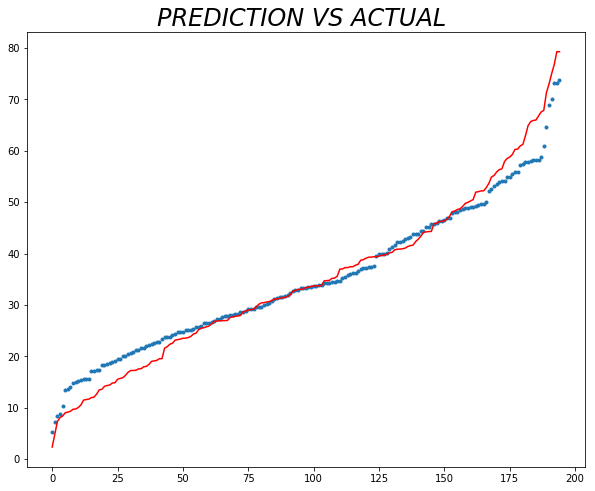

X in  [0, 1, 2, 4, 5, 6, 7]
Mean Squared Error :  74.22767520118512
R______Score Error :  0.6086245292705323
SVR  Model coefficient  [[0.13058554 0.10750394 0.08159736 0.52159403 0.03123062 0.02788805
  0.29773823]]
SVR  Model collinearity  [-79.37238319]


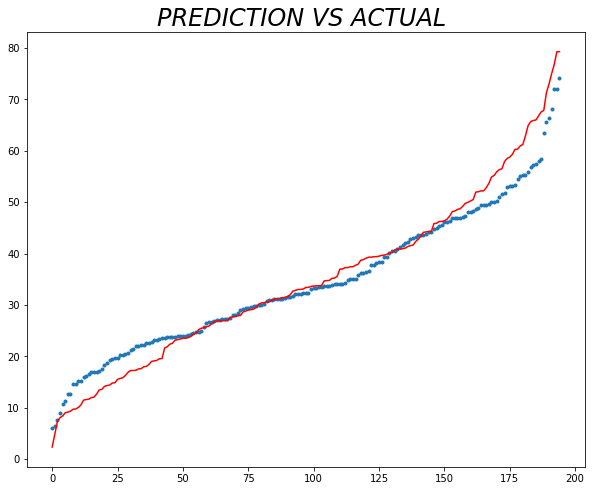

X in  [0, 1, 3, 4, 5, 6, 7]
Mean Squared Error :  73.5008870346268
R______Score Error :  0.6389796951803952
SVR  Model coefficient  [[ 0.08029045  0.04216914 -0.23928392  0.48837144 -0.02608741 -0.03851031
   0.30787598]]
SVR  Model collinearity  [94.85004344]


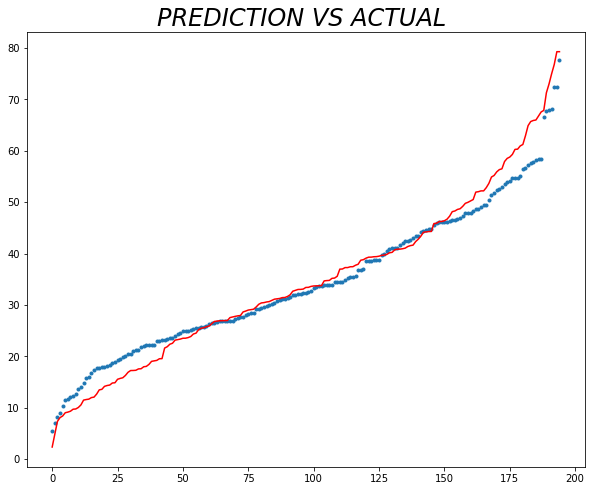

X in  [0, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  77.16754786063147
R______Score Error :  0.6177260882381514
SVR  Model coefficient  [[ 0.04951814 -0.03120757 -0.36106191  0.33217899 -0.05731818 -0.07607764
   0.32683501]]
SVR  Model collinearity  [189.84258096]


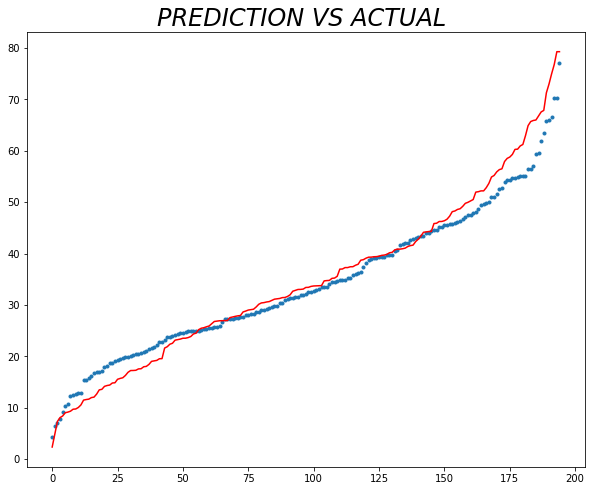

X in  [1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  87.23667055039812
R______Score Error :  0.5245361071865187
SVR  Model coefficient  [[-0.04120513 -0.0747741  -0.4814521   0.37135809 -0.09148369 -0.12381521
   0.31930136]]
SVR  Model collinearity  [300.88613554]


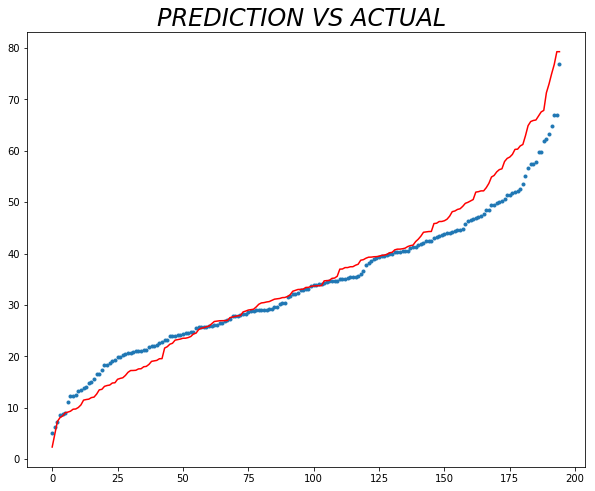

In [49]:
from sklearn.svm import SVR

for i1 in range(dataSet.shape[1]-1,-1,-1):
    index = [i for i in range(dataSet.shape[1]-1) if i != i1 ]
    X = dataSet.iloc[:,index].values
    y = dataSet.iloc[:,-1].values
    print('X in ',index)

    from sklearn.model_selection import train_test_split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=0)
    
    model = SVR(kernel='linear')
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    score(y_pred,y_test)
    hypothesis(model)
    display(y_pred,y_test)

In [50]:
# Random forced regression

X in  [0, 1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  25.822177040500424
R______Score Error :  0.8900596159575129
RandomForestRegressor  Has no coefficient and collinearity


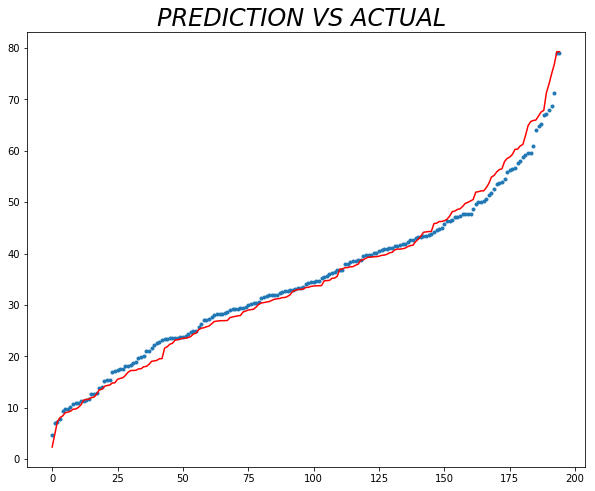

X in  [0, 1, 2, 3, 4, 5, 6]
Mean Squared Error :  197.46778633632147
R______Score Error :  -0.11788675264157433
RandomForestRegressor  Has no coefficient and collinearity


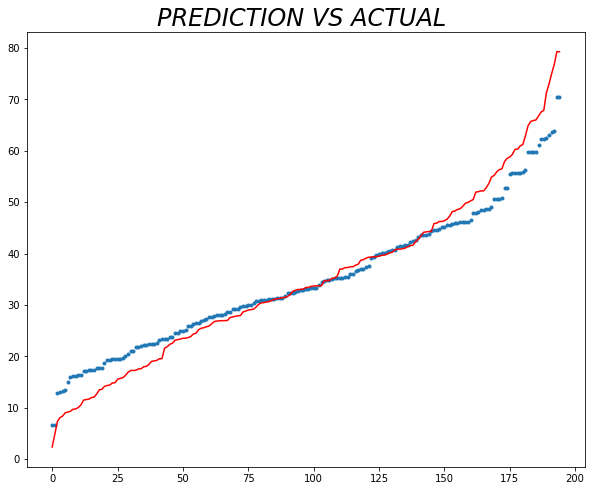

X in  [0, 1, 2, 3, 4, 5, 7]
Mean Squared Error :  23.573706433496334
R______Score Error :  0.9005159881370309
RandomForestRegressor  Has no coefficient and collinearity


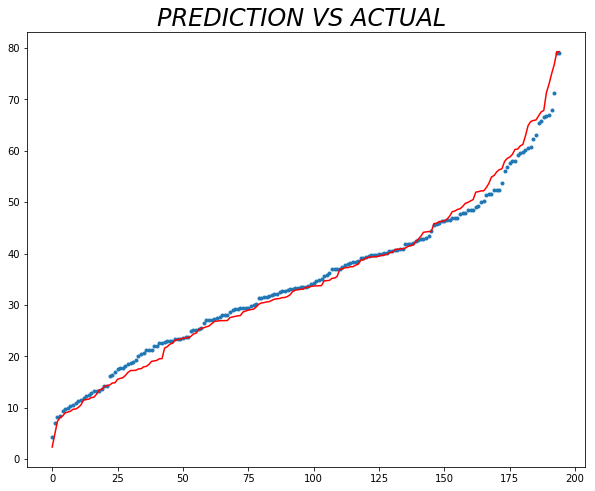

X in  [0, 1, 2, 3, 4, 6, 7]
Mean Squared Error :  25.020765886128707
R______Score Error :  0.89541804880355
RandomForestRegressor  Has no coefficient and collinearity


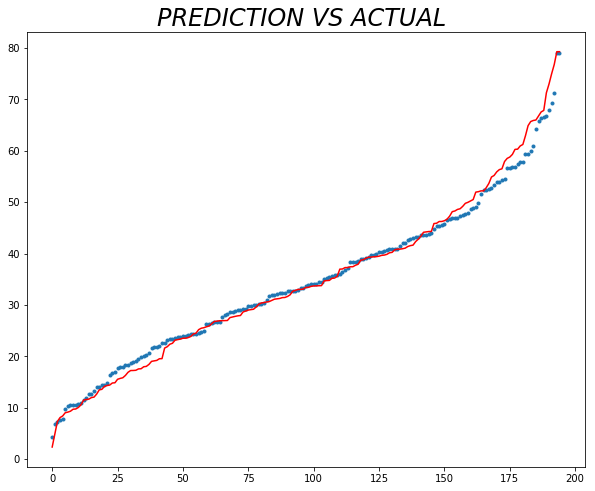

X in  [0, 1, 2, 3, 5, 6, 7]
Mean Squared Error :  28.42064339251055
R______Score Error :  0.8772630490928929
RandomForestRegressor  Has no coefficient and collinearity


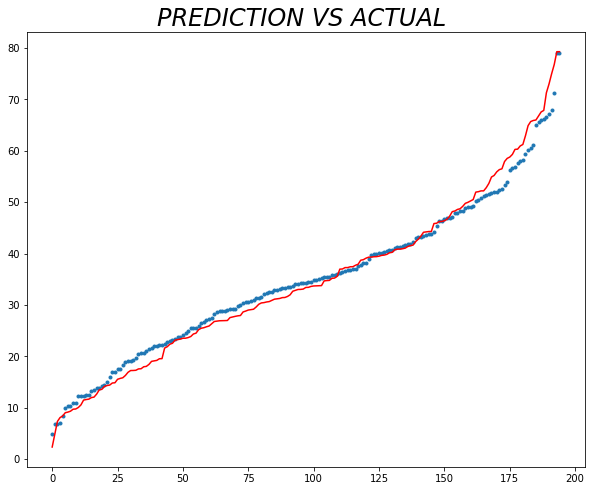

X in  [0, 1, 2, 4, 5, 6, 7]
Mean Squared Error :  34.72193738523076
R______Score Error :  0.8505574117041993
RandomForestRegressor  Has no coefficient and collinearity


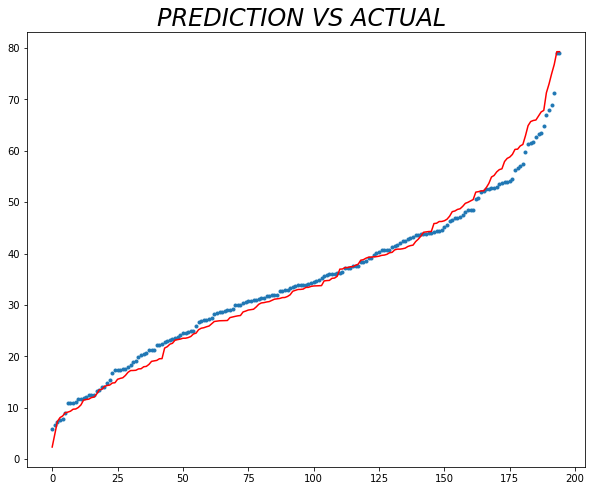

X in  [0, 1, 3, 4, 5, 6, 7]
Mean Squared Error :  26.82919816159093
R______Score Error :  0.88512078813401
RandomForestRegressor  Has no coefficient and collinearity


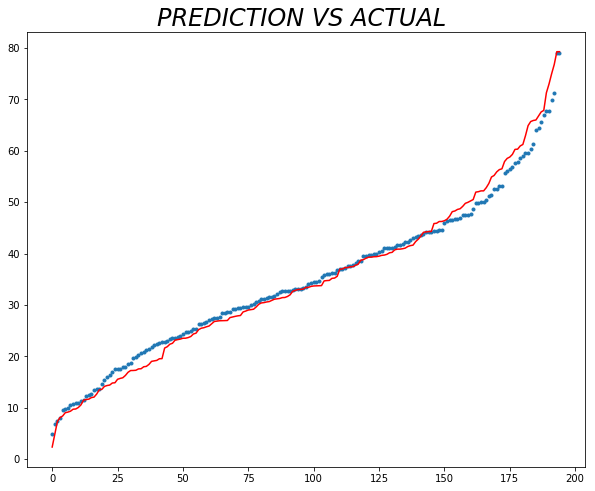

X in  [0, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  33.976209495110325
R______Score Error :  0.853800490152518
RandomForestRegressor  Has no coefficient and collinearity


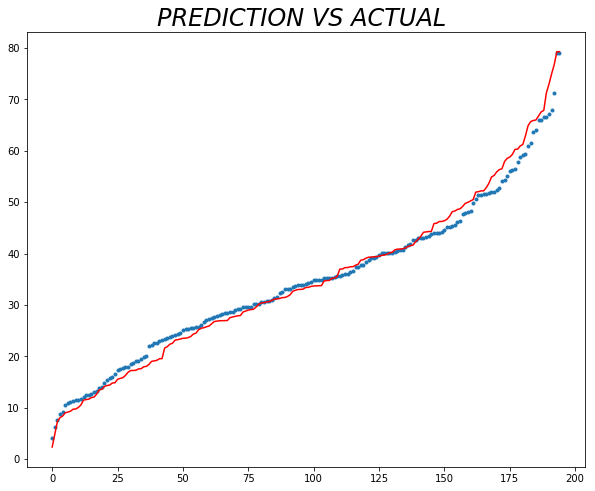

X in  [1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  35.21534823796226
R______Score Error :  0.8487946208203543
RandomForestRegressor  Has no coefficient and collinearity


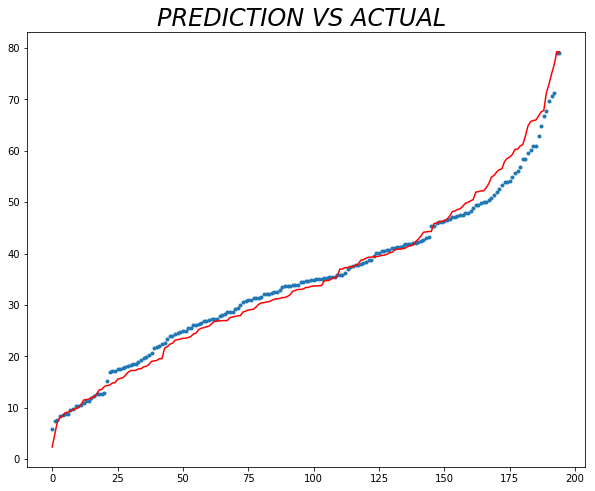

In [54]:
from sklearn.ensemble import RandomForestRegressor

for i1 in range(dataSet.shape[1]-1,-1,-1):
    index = [i for i in range(dataSet.shape[1]-1) if i != i1 ]
    X = dataSet.iloc[:,index].values
    y = dataSet.iloc[:,-1].values
    print('X in ',index)

    from sklearn.model_selection import train_test_split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=0)

    model = RandomForestRegressor(n_estimators=10,random_state=0)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    score(y_pred,y_test)
    hypothesis(model)
    display(y_pred,y_test)

In [55]:
# Decision Tree Regression

X in  [0, 1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  40.45763796955142
R______Score Error :  0.8485518401326924
DecisionTreeRegressor  Has no coefficient and collinearity


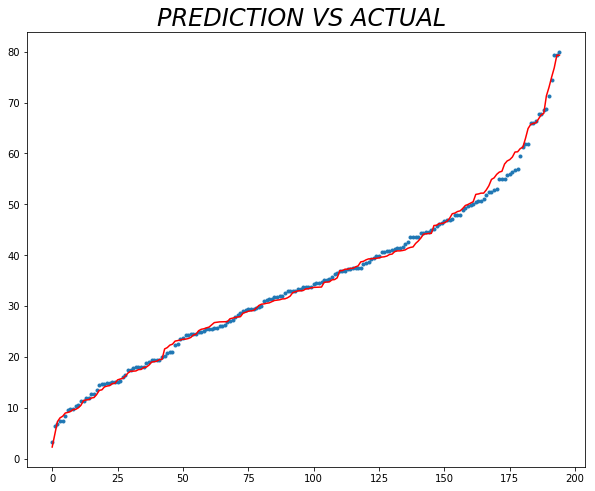

X in  [0, 1, 2, 3, 4, 5, 6]
Mean Squared Error :  202.39670859137206
R______Score Error :  -0.05652891225605061
DecisionTreeRegressor  Has no coefficient and collinearity


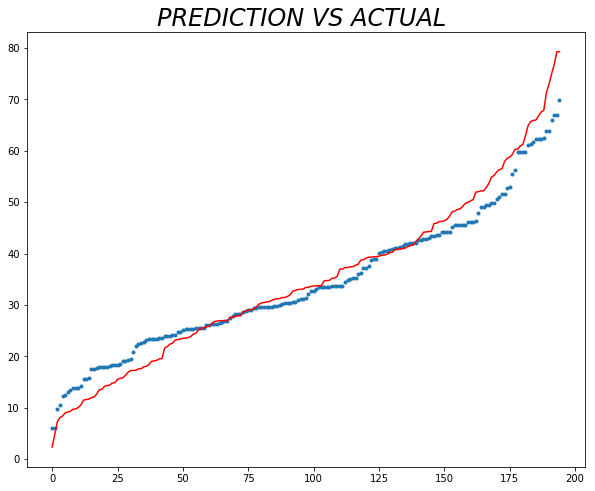

X in  [0, 1, 2, 3, 4, 5, 7]
Mean Squared Error :  48.38493549889782
R______Score Error :  0.82667336010779
DecisionTreeRegressor  Has no coefficient and collinearity


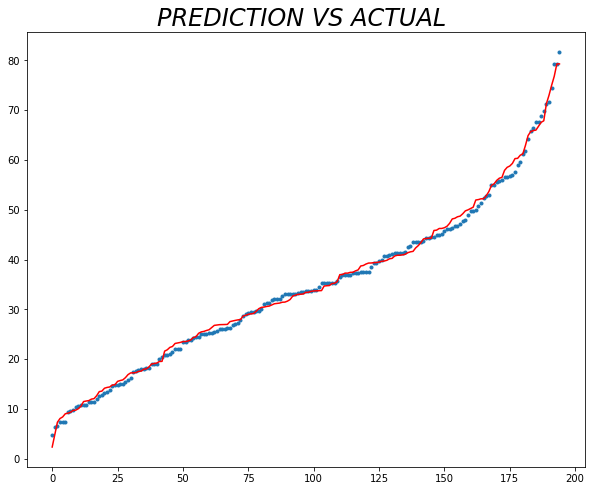

X in  [0, 1, 2, 3, 4, 6, 7]
Mean Squared Error :  36.52181402272147
R______Score Error :  0.8619463267323143
DecisionTreeRegressor  Has no coefficient and collinearity


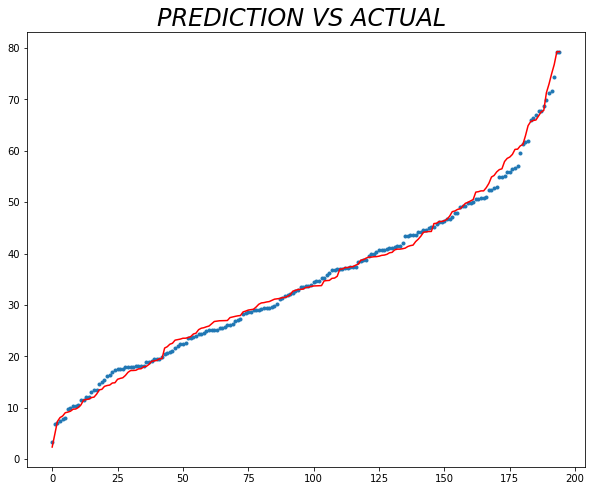

X in  [0, 1, 2, 3, 5, 6, 7]
Mean Squared Error :  47.16186625643657
R______Score Error :  0.8279598764775742
DecisionTreeRegressor  Has no coefficient and collinearity


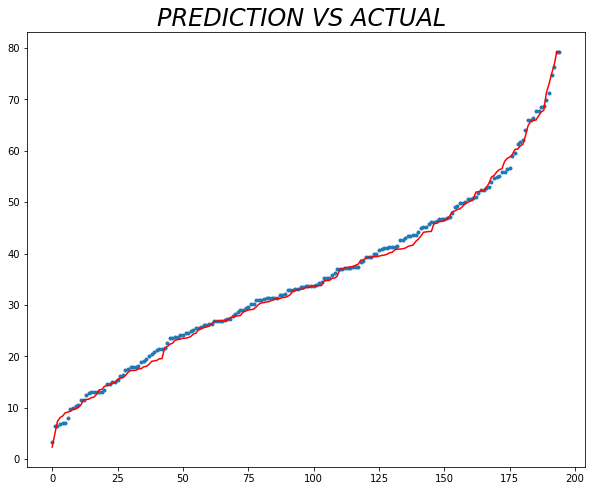

X in  [0, 1, 2, 4, 5, 6, 7]
Mean Squared Error :  58.2387135331876
R______Score Error :  0.768660650277877
DecisionTreeRegressor  Has no coefficient and collinearity


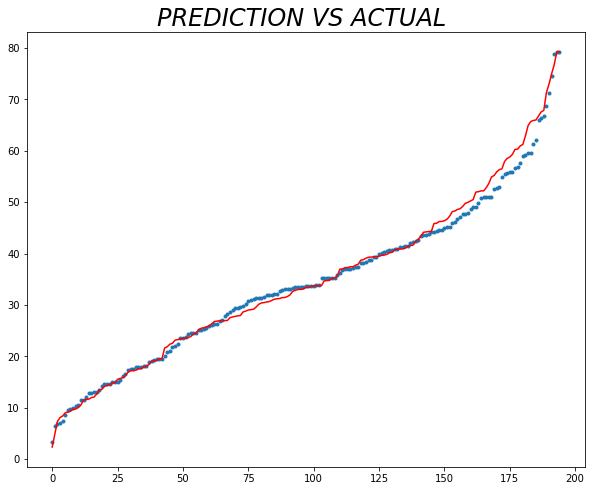

X in  [0, 1, 3, 4, 5, 6, 7]
Mean Squared Error :  36.82454305403736
R______Score Error :  0.8649922955408603
DecisionTreeRegressor  Has no coefficient and collinearity


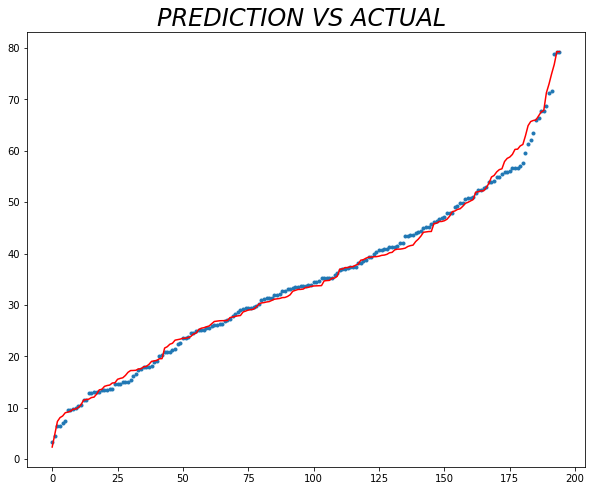

X in  [0, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  45.121024680993415
R______Score Error :  0.8261029014251341
DecisionTreeRegressor  Has no coefficient and collinearity


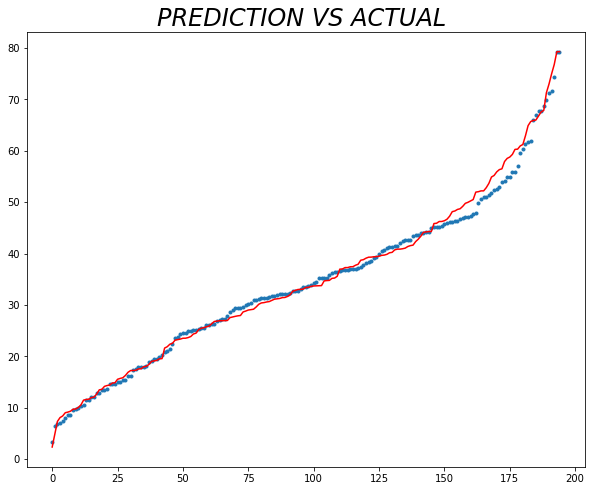

X in  [1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  57.798027823995405
R______Score Error :  0.792249411431428
DecisionTreeRegressor  Has no coefficient and collinearity


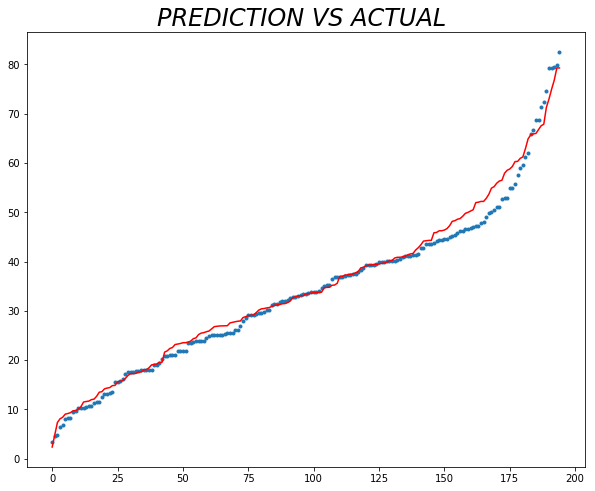

In [56]:
from sklearn.tree import DecisionTreeRegressor

for i1 in range(dataSet.shape[1]-1,-1,-1):
    index = [i for i in range(dataSet.shape[1]-1) if i != i1 ]
    X = dataSet.iloc[:,index].values
    y = dataSet.iloc[:,-1].values
    print('X in ',index)

    from sklearn.model_selection import train_test_split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=0)

    model = DecisionTreeRegressor()
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    score(y_pred,y_test)
    hypothesis(model)
    display(y_pred,y_test)

X in  [0, 1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  42.04664306259534
R______Score Error :  0.8417900866060792
LinearRegression  Model coefficient  [ 1.22174503e-02 -7.55971055e+01 -4.73810445e+01 -3.14743813e+02
  1.22895157e+02  9.45521129e+02 -1.06578787e+02 -1.08335295e+02
  5.75436688e+01  2.67279455e-02  5.13685698e-02  2.04382180e-01
 -2.71387090e-02 -4.31337230e-01  6.14235705e-02  9.28595895e-02
 -2.01696480e-02  1.93683209e-02  1.91455457e-01 -1.17872845e-01
 -3.46630302e-01  1.80618874e-02  9.96544582e-02 -7.33403053e-03
  2.10652357e-01  3.54417781e-01 -1.94049038e-02  2.24398720e-01
  3.35486721e-01 -8.58454038e-02 -5.28433765e-01 -3.17439883e+00
 -3.72415057e-02  1.41655083e-02 -1.42170186e-01 -2.04766039e+00
 -4.78200138e-01 -8.96303582e-01  3.74084569e-01  5.93583420e-02
  1.03320663e-01 -6.35453965e-02  4.65407566e-02 -1.95828588e-02
 -2.24974136e-03 -2.35356927e-06 -9.45842905e-06 -3.30426895e-05
 -2.16715074e-06  5.94558922e-05 -9.72961314e-06 -1.70305809e-05
  2.90

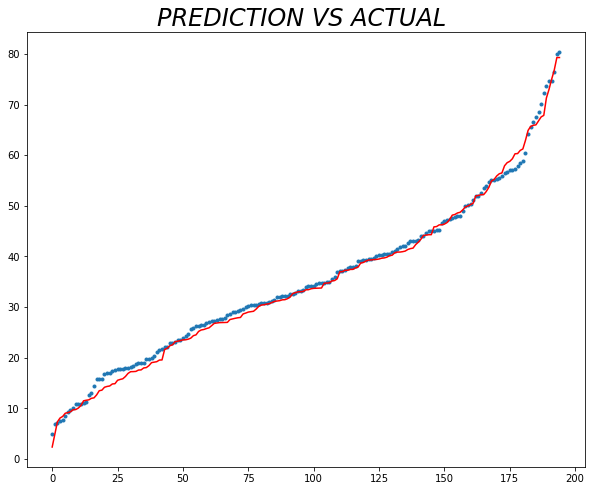

X in  [0, 1, 2, 3, 4, 5, 6]
Mean Squared Error :  179.3916172029896
R______Score Error :  0.05649228769333725
LinearRegression  Model coefficient  [-3.42582916e-02  1.99352876e+02  3.08396333e+02  1.35763006e+01
  1.25069619e+03  2.37621855e+03  2.34154298e+02  3.22632787e+02
 -4.90224252e-02 -1.53027228e-01  3.51692883e-03 -6.33139282e-01
 -1.03688122e+00 -1.32115214e-01 -1.41086189e-01 -9.57026048e-02
 -5.13297723e-02 -9.10078573e-01 -1.29500700e+00 -2.36790625e-01
 -1.95335980e-01  9.25097494e-02 -3.22089479e-01 -6.62691687e-01
 -2.02166618e-02  6.54327030e-02 -1.77785170e+00 -6.29037403e+00
 -8.65440335e-01 -9.14121357e-01 -5.69570541e+00 -1.59780917e+00
 -1.99928548e+00 -5.23784146e-02 -1.86992577e-01 -1.50175044e-01
  5.36181233e-06  2.22606402e-05 -1.76680126e-06  7.81990590e-05
  1.01398546e-04  1.71365236e-05  1.43183568e-05  2.57039370e-05
  1.42665695e-05  2.28778019e-04  2.73846356e-04  6.27771667e-05
  3.98328652e-05 -2.10504300e-05  5.89360369e-05  7.11406382e-05
  9.1337

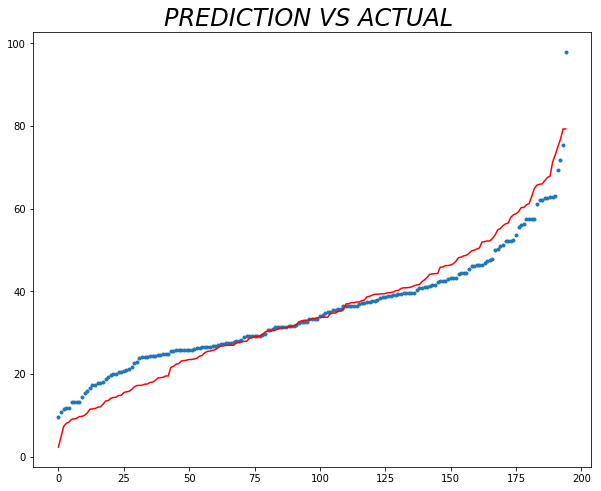

X in  [0, 1, 2, 3, 4, 5, 7]
Mean Squared Error :  34.40426061668098
R______Score Error :  0.8582563951009086
LinearRegression  Model coefficient  [ 1.37061930e-05  2.91112493e+00  3.47213631e+00  1.85231705e+01
  1.20967242e+01 -1.41236831e+02  2.17834878e+00 -9.17919449e+00
 -7.50095277e-04  2.21013079e-05 -9.68700860e-03 -4.62432447e-03
  5.86501614e-02 -4.41844982e-03  1.12196935e-02 -1.84915824e-03
 -9.45395385e-03  5.14922146e-03  4.72502833e-02 -7.64681608e-03
  1.05303141e-02 -1.40717336e-02 -5.27303925e-02 -6.33217370e-02
 -2.29943835e-02  1.13216227e-02 -5.78319606e-02  3.22753465e-01
  9.27966305e-04  4.49423834e-02  1.62028030e+00  2.01020638e-01
  6.35227239e-02 -1.21796154e-03  7.53421931e-03 -1.16917170e-02
  6.55120132e-07  1.38838006e-06  1.09553902e-06  6.42040991e-07
 -1.41165768e-05 -8.53646682e-08 -2.32332418e-06  6.78969936e-07
  1.90076458e-06 -9.03607473e-07  5.19560559e-06 -8.09300914e-07
 -4.77729313e-06  8.44862502e-06  1.35228777e-05  5.35232366e-05
  5.09386

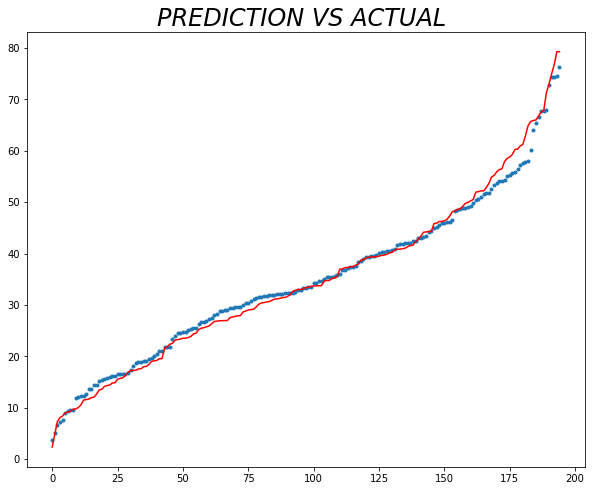

X in  [0, 1, 2, 3, 4, 6, 7]
Mean Squared Error :  35.140734758270774
R______Score Error :  0.8561715577091836
LinearRegression  Model coefficient  [ 9.03419699e-06 -1.44786240e+00 -2.59769494e+00 -1.11960720e+01
  8.43654868e-01  8.07455426e+01  1.21413040e-02 -8.88555900e+00
 -4.13967476e-04 -1.77457621e-03  5.26771326e-03  3.73782988e-03
 -7.28503227e-02  3.79688630e-03  8.53523040e-03 -2.40371440e-03
  6.49762153e-03  1.28056816e-02 -4.53347148e-02  3.89677200e-03
  2.39830650e-02  9.47103390e-03  5.34167312e-02 -1.11911759e-01
  1.27047683e-02  1.91575895e-02 -1.26013196e-02 -4.26818416e-01
 -2.20055182e-03  2.75500911e-02 -1.97898238e-01 -6.22876567e-02
 -6.20109167e-02 -9.15327967e-04  1.33157238e-02 -1.55142613e-02
  9.38771713e-07  2.71782219e-06  6.82762305e-07  1.61290086e-06
 -1.13165232e-05 -1.33978047e-06 -6.15354335e-07  1.17991682e-06
 -3.96951604e-07  8.37764287e-06  4.28016537e-05 -1.91905678e-06
 -7.88617026e-06  1.21485549e-06 -9.38476385e-06  7.08869260e-05
 -6.1739

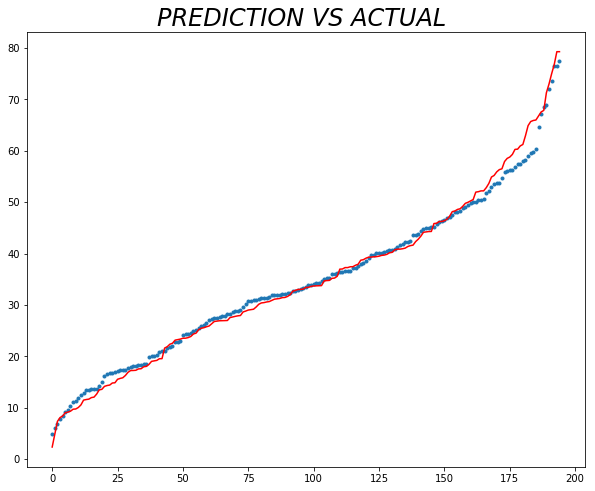

X in  [0, 1, 2, 3, 5, 6, 7]
Mean Squared Error :  37.581266909663334
R______Score Error :  0.8623177260971319
LinearRegression  Model coefficient  [-1.94486739e-04 -1.27971482e+02 -1.30387956e+02 -2.43074758e+02
 -8.30387347e+01 -1.27705482e+02 -2.20603807e+02  6.00641621e+00
  3.81661074e-02  8.72063855e-02  1.61804712e-01  1.20253626e-01
  7.71936117e-02  1.61689889e-01 -7.19592749e-03  6.32864763e-02
  1.69620984e-01  1.15965500e-01  6.26505544e-02  1.78095380e-01
  1.21259082e-03  1.35613378e-01  2.32740386e-01  1.52634909e-01
  2.90974809e-01 -1.22150412e-02 -2.41936254e-01  1.71923656e-02
  2.46298020e-01 -9.52276743e-03  4.98285628e-02  1.57863359e-01
 -1.75516895e-02  1.10179922e-01  1.52675102e-02 -6.17793782e-03
 -2.87853386e-06 -1.12048308e-05 -2.47895463e-05 -1.86526910e-05
 -1.05733310e-05 -2.62977239e-05 -1.35637500e-06 -1.78675125e-05
 -5.55072363e-05 -4.73087596e-05 -2.03908074e-05 -6.14971587e-05
 -3.95038430e-06 -4.04747740e-05 -8.86080706e-05 -4.88455877e-05
 -9.9400

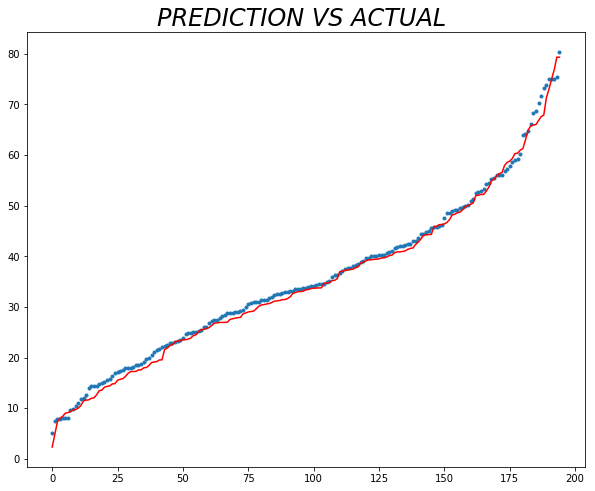

X in  [0, 1, 2, 4, 5, 6, 7]
Mean Squared Error :  40.026884519917026
R______Score Error :  0.8377711069874482
LinearRegression  Model coefficient  [-9.39581941e-05 -1.20768953e+01 -1.71021912e+01 -1.05585348e+01
 -1.35434297e+02 -3.20148406e+00 -1.79051198e+01  4.81352169e+00
  6.53377726e-03  2.26600865e-02  1.53615489e-02  1.23215683e-01
  3.11653716e-03  1.90933812e-02  1.35236155e-03  1.50488752e-02
  1.64000180e-02  1.02994101e-01  2.65899041e-03  2.85624544e-02
  1.16120096e-03 -4.91621376e-03  2.81340163e-01  4.72456128e-03
  1.41910653e-02 -2.85408039e-03 -3.48545749e-02  1.00438203e-01
  1.09092048e-01  1.34331386e-01 -3.45902065e-03  1.43815357e-02
 -1.96919115e-02  8.44042408e-03  1.00352188e-02  1.33111128e-02
 -9.31013862e-07 -5.58110574e-06 -5.23975057e-06 -3.09721646e-05
 -1.12797734e-06 -5.11519058e-06 -2.22401206e-06 -8.34650091e-06
 -1.24578670e-05 -4.53549842e-05 -5.76765794e-06 -1.54819274e-05
 -6.76613213e-06  2.99248944e-06 -8.42381522e-05 -3.39459454e-06
 -1.1300

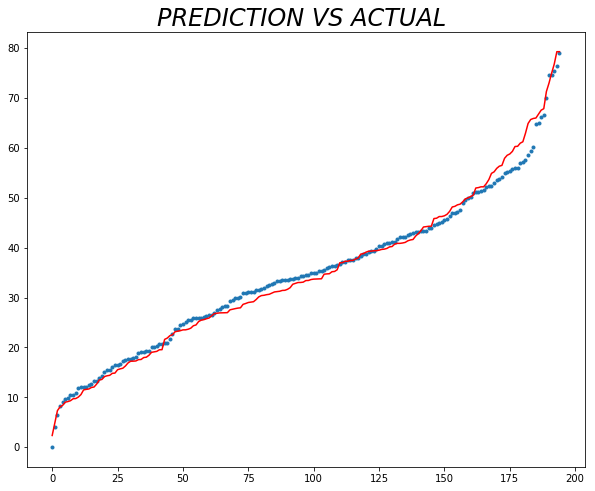

X in  [0, 1, 3, 4, 5, 6, 7]
Mean Squared Error :  37.78013353783865
R______Score Error :  0.8427854658908017
LinearRegression  Model coefficient  [ 9.35097347e-04  5.09486418e+01  5.95034797e+01  1.30142400e+02
  5.64090424e+02  3.14869099e+01  6.76288824e+01  3.75714522e-02
 -1.95141983e-02 -3.78318463e-02 -1.01499846e-01 -3.71384704e-01
 -3.51281434e-02 -4.47407348e-02 -5.97959424e-04 -3.01869571e-02
 -1.16981914e-01 -4.62766849e-01 -4.54811627e-02 -4.73805617e-02
 -7.37868641e-03 -1.48783376e-01 -1.00501252e+00 -3.85170980e-02
 -1.64166060e-01 -8.32049396e-03  6.53372265e-01 -3.05044278e-01
 -6.73661570e-01 -6.15910815e-03 -4.39876044e-03 -4.31233534e-02
 -6.38891229e-03 -2.93577463e-02  1.58220437e-02 -2.91930511e-02
  2.79915723e-06  8.13165404e-06  1.96673921e-05  4.04749810e-05
  6.95587929e-06  7.92304535e-06  5.50333112e-11  9.91434209e-06
  3.97230482e-05  1.16704133e-04  1.26695414e-05  1.54061767e-05
  1.28583903e-06  4.67500669e-05  3.28840001e-04  2.94659625e-05
  5.35811

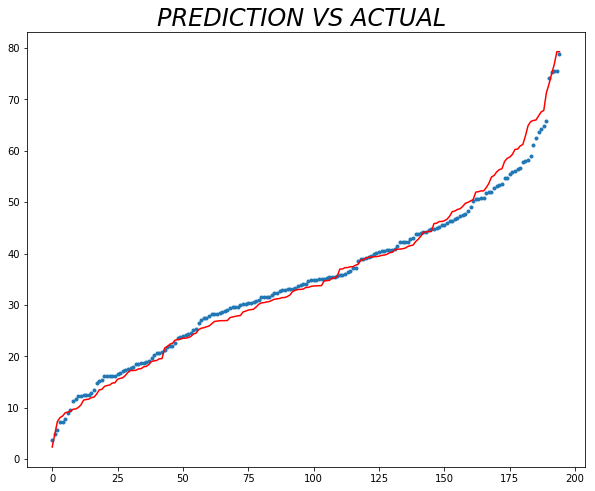

X in  [0, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  86.86017523740216
R______Score Error :  0.6721193833264051
LinearRegression  Model coefficient  [-5.63098278e-05 -1.24704228e-01 -3.30533491e+01  2.65645004e+01
  2.98539946e+02 -3.86959304e+01 -1.00086711e+01 -7.76203310e+00
 -3.23923141e-03  7.90057187e-03 -7.85607008e-03 -9.79726622e-02
  7.77546538e-03 -5.36816611e-03 -4.92176619e-03  1.93715158e-02
  4.81470088e-02 -5.44317917e-02  3.29000857e-02  2.77121633e-02
 -6.96178209e-03 -2.07955983e-01 -1.23220489e+00  4.56699204e-02
 -1.37301381e-02  1.74577625e-04 -7.20085477e-01 -1.29657070e-01
 -2.45707816e-01  6.98484649e-03  2.34318762e-02  2.61677228e-02
  1.42031993e-02 -1.41402979e-03  1.37870930e-02 -5.24211792e-02
  3.89028912e-07  3.49493195e-07  4.87590577e-06 -4.10128672e-07
  8.45039210e-07  1.54372568e-06  2.11295301e-06  6.89131684e-06
 -1.22913049e-05  1.69052021e-05 -3.81690813e-06 -4.42490161e-06
  8.31657633e-06  1.59411090e-05  2.37843120e-04 -8.66350243e-06
  8.90375

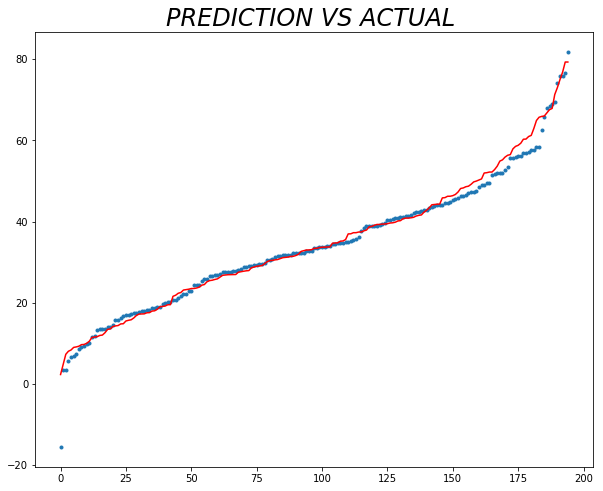

X in  [1, 2, 3, 4, 5, 6, 7]
Mean Squared Error :  58.21840552750935
R______Score Error :  0.7587700216775627
LinearRegression  Model coefficient  [-2.63124826e-05  1.74707888e+01 -3.14328861e+00  7.50087410e+01
  7.56732098e+00 -6.87588353e+00  1.02279431e+01 -3.67628713e+00
 -3.75389406e-03 -3.21394325e-02 -1.35946765e-02  1.94069049e-01
 -2.26154814e-02 -1.28499756e-02 -2.03911743e-03 -8.55358262e-03
  3.41177681e-02  4.66054821e-01 -6.42280962e-03  5.88584527e-03
  1.73419807e-02 -2.23961980e-01 -3.62464913e-01 -1.92049705e-02
 -6.01755453e-02  3.38395877e-03 -3.00895386e-01  8.59605749e-02
 -2.77392622e-02 -4.13314023e-01  8.14135731e-03  3.03857977e-03
  2.52353991e-03 -7.83443436e-03  1.41887947e-02 -4.59065108e-02
  2.60925690e-07  3.44422028e-06  1.68418869e-06 -7.67042982e-06
  3.11198586e-06  4.66524269e-07 -4.31135255e-07  1.65532338e-05
  2.12052137e-05 -5.33868328e-05  1.75690086e-05  1.25087845e-05
 -8.45261056e-06 -4.06870783e-05 -4.09314924e-04  1.96278646e-05
  1.51456

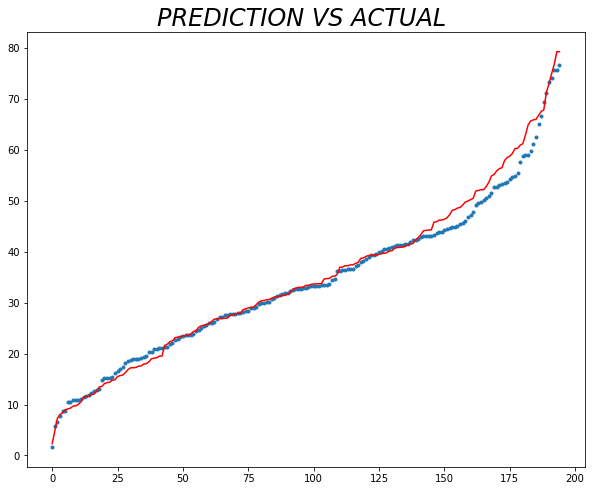

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

for i1 in range(dataSet.shape[1]-1,-1,-1):
    index = [i for i in range(dataSet.shape[1]-1) if i != i1 ]
    x_poly = PolynomialFeatures(degree=3)
    X = dataSet.iloc[:,index].values
    y = dataSet.iloc[:,-1].values
    print('X in ',index)
    
    X = x_poly.fit_transform(X)
    
    from sklearn.model_selection import train_test_split
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=0)

    model = LinearRegression()
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    score(y_pred,y_test)
    hypothesis(model)
    display(y_pred,y_test)